In [3]:
print(df.columns)

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')


In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\sanke\Downloads\archive (1)\crime_dataset_india.csv')

# Convert dates to datetime
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')

# Extract year
df['Year'] = df['Date of Occurrence'].dt.year

# Drop rows without year or city
df = df.dropna(subset=['Year', 'City'])


C:\Users\sanke\AppData\Local\Temp\ipykernel_8800\3043317501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')


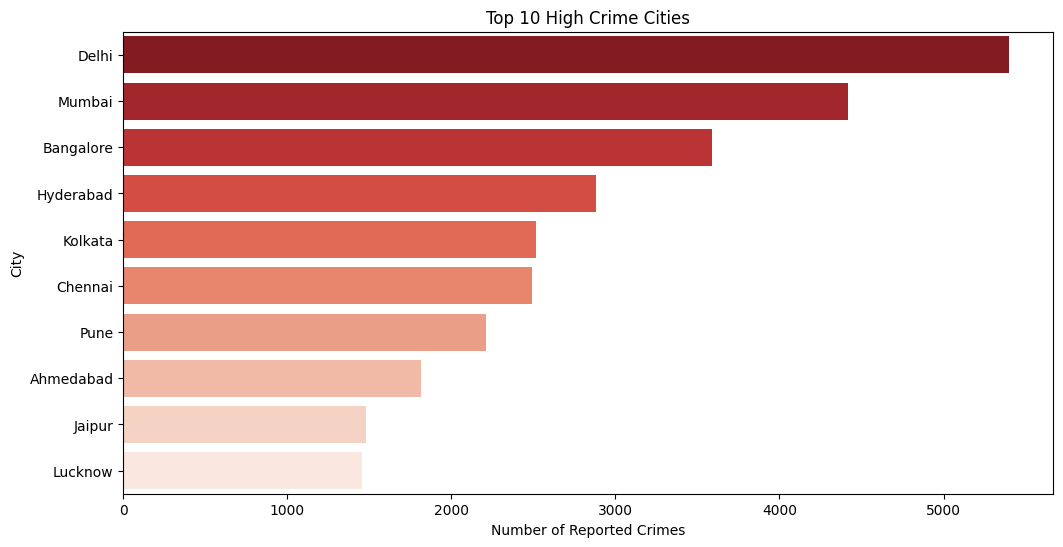

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.title('Top 10 High Crime Cities')
plt.xlabel('Number of Reported Crimes')
plt.ylabel('City')
plt.show()


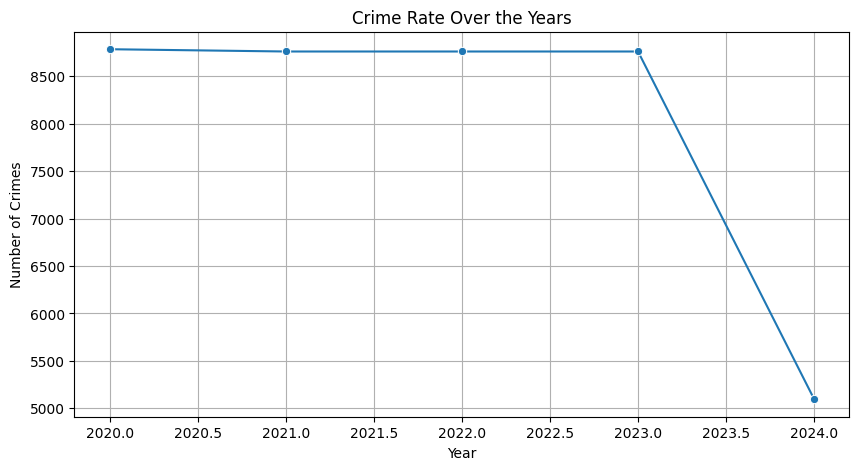

In [6]:
crime_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=crime_by_year.index, y=crime_by_year.values, marker='o')
plt.title('Crime Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


C:\Users\sanke\AppData\Local\Temp\ipykernel_8800\1510238494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_types.values, y=crime_types.index, palette='coolwarm')


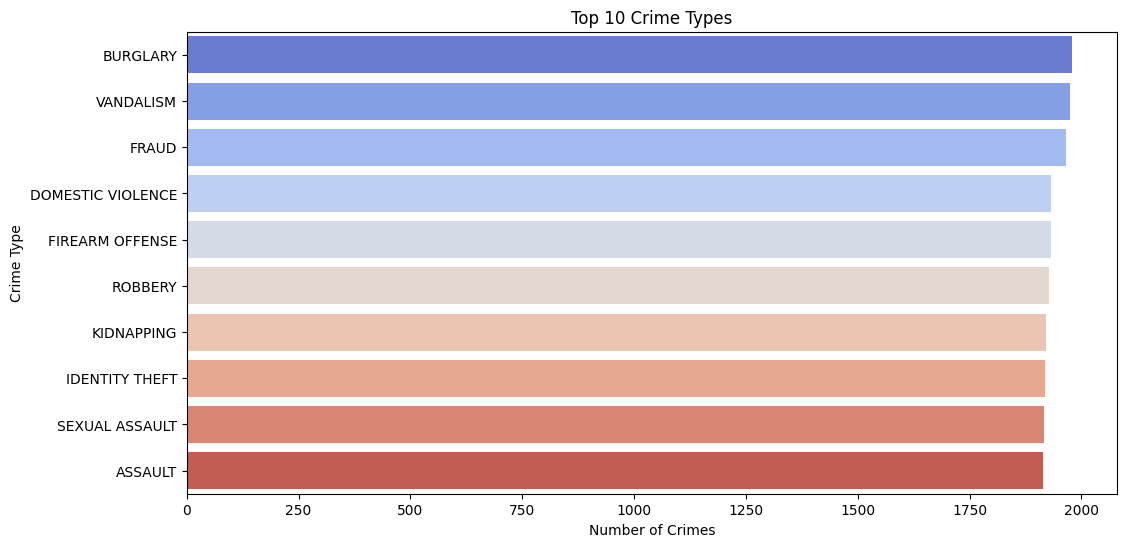

In [7]:
crime_types = df['Crime Description'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=crime_types.values, y=crime_types.index, palette='coolwarm')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()



In [1]:
pip install faker pandas tqdm


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 1.2 MB/s eta 0:00:02
   --------------------- ------------------ 1.0/1.9 MB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 1.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/1.9 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import random
from faker import Faker
from tqdm import tqdm
from datetime import datetime, timedelta

fake = Faker('en_IN')
Faker.seed(42)
random.seed(42)

# Popular Indian crime types
crime_types = [
    "Theft", "Assault (IPC 323)", "Rape (IPC 376)", "Dowry Death (IPC 304B)",
    "Cheating & Fraud (IPC 420)", "Rioting (IPC 147)", "Murder (IPC 302)",
    "Kidnapping", "Cybercrime", "Drug-related (NDPS Act)"
]

crime_statuses = ["Reported", "Under Investigation", "ChargeSheeted", "Convicted", "Acquitted"]

# 10+ districts for each major Indian state
state_districts = {
    "Maharashtra": ["Mumbai", "Pune", "Nagpur", "Nashik", "Thane", "Aurangabad", "Kolhapur", "Solapur", "Amravati", "Satara"],
    "Uttar Pradesh": ["Lucknow", "Kanpur", "Varanasi", "Agra", "Ghaziabad", "Noida", "Meerut", "Allahabad", "Bareilly", "Gorakhpur"],
    "Delhi": ["New Delhi", "North Delhi", "South Delhi", "East Delhi", "West Delhi", "North West Delhi", "South East Delhi", "Central Delhi", "Shahdara", "Dwarka"],
    "Tamil Nadu": ["Chennai", "Madurai", "Coimbatore", "Salem", "Tirunelveli", "Trichy", "Erode", "Thanjavur", "Vellore", "Dindigul"],
    "Karnataka": ["Bengaluru", "Mysuru", "Mangalore", "Hubli", "Belagavi", "Dharwad", "Tumkur", "Gulbarga", "Bellary", "Raichur"],
    "West Bengal": ["Kolkata", "Howrah", "Durgapur", "Siliguri", "Asansol", "Darjeeling", "Malda", "Berhampore", "Jalpaiguri", "Haldia"],
    "Gujarat": ["Ahmedabad", "Surat", "Vadodara", "Rajkot", "Bhavnagar", "Jamnagar", "Junagadh", "Gandhinagar", "Anand", "Mehsana"],
    "Punjab": ["Ludhiana", "Amritsar", "Jalandhar", "Patiala", "Bathinda", "Mohali", "Hoshiarpur", "Firozpur", "Gurdaspur", "Sangrur"],
    "Rajasthan": ["Jaipur", "Jodhpur", "Udaipur", "Kota", "Ajmer", "Bikaner", "Bhilwara", "Alwar", "Sikar", "Barmer"],
    "Bihar": ["Patna", "Gaya", "Muzaffarpur", "Bhagalpur", "Darbhanga", "Purnia", "Ara", "Samastipur", "Begusarai", "Katihar"],
    "Telangana": ["Hyderabad", "Warangal", "Nizamabad", "Karimnagar", "Khammam", "Adilabad", "Nalgonda", "Ramagundam", "Mahbubnagar", "Medak"],
    "Madhya Pradesh": ["Bhopal", "Indore", "Jabalpur", "Gwalior", "Ujjain", "Sagar", "Satna", "Rewa", "Ratlam", "Chhindwara"],
    "Odisha": ["Bhubaneswar", "Cuttack", "Puri", "Rourkela", "Sambalpur", "Balasore", "Berhampur", "Baripada", "Angul", "Kendujhar"],
    "Kerala": ["Kochi", "Thiruvananthapuram", "Kozhikode", "Thrissur", "Kannur", "Alappuzha", "Palakkad", "Kollam", "Kottayam", "Malappuram"],
    "Haryana": ["Gurugram", "Faridabad", "Panipat", "Ambala", "Rohtak", "Hisar", "Karnal", "Yamunanagar", "Sonipat", "Panchkula"],
    "Jharkhand": ["Ranchi", "Jamshedpur", "Dhanbad", "Bokaro", "Deoghar", "Hazaribagh", "Giridih", "Palamu", "Dumka", "Chaibasa"],
    "Assam": ["Guwahati", "Silchar", "Dibrugarh", "Jorhat", "Tezpur", "Nagaon", "Tinsukia", "Goalpara", "Barpeta", "Bongaigaon"],
    "Chhattisgarh": ["Raipur", "Bilaspur", "Durg", "Korba", "Rajnandgaon", "Jagdalpur", "Ambikapur", "Raigarh", "Kanker", "Dhamtari"],
    "Himachal Pradesh": ["Shimla", "Mandi", "Kullu", "Dharamshala", "Solan", "Una", "Bilaspur", "Hamirpur", "Chamba", "Kangra"],
    "Uttarakhand": ["Dehradun", "Haridwar", "Nainital", "Haldwani", "Roorkee", "Rudrapur", "Pithoragarh", "Almora", "Tehri", "Bageshwar"]
}

# Generate dataset
rows = []
for i in tqdm(range(200000), desc="Generating crime data"):
    state = random.choice(list(state_districts.keys()))
    district = random.choice(state_districts[state])
    crime_type = random.choice(crime_types)
    
    # Generate unique Crime ID
    crime_id = f"{random.randint(2018,2024)}{state[:2].upper()}{str(i).zfill(6)}"
    
    crime_date = fake.date_between(start_date='-5y', end_date='today')
    fir_date = crime_date + timedelta(days=random.randint(0, 3))
    victim_age = random.randint(5, 70)
    crime_status = random.choice(crime_statuses)

    rows.append({
        "Crime_ID": crime_id,
        "Crime_Type": crime_type,
        "State": state,
        "District": district,
        "Crime_Date": crime_date.strftime("%Y-%m-%d"),
        "Victim_Age": victim_age,
        "FIR_Registered": fir_date.strftime("%Y-%m-%d"),
        "Crime_Status": crime_status
    })

# Create and export DataFrame
df = pd.DataFrame(rows)
df.to_csv("indian_crime_dataset_200k.csv", index=False)

print("✅ Dataset with 200,000 records and 10+ districts per state saved as 'indian_crime_dataset_200k.csv'")


Generating crime data: 100%|██████████| 200000/200000 [00:10<00:00, 19055.86it/s]


✅ Dataset with 200,000 records and 10+ districts per state saved as 'indian_crime_dataset_200k.csv'


In [3]:
import pandas as pd
import random
from faker import Faker
from tqdm import tqdm
from datetime import datetime, timedelta

fake = Faker('en_IN')
Faker.seed(42)
random.seed(42)

# Crime types
crime_types = [
    "Theft", "Assault (IPC 323)", "Rape (IPC 376)", "Dowry Death (IPC 304B)",
    "Cheating & Fraud (IPC 420)", "Rioting (IPC 147)", "Murder (IPC 302)",
    "Kidnapping", "Cybercrime", "Drug-related (NDPS Act)"
]

# Crime statuses
crime_statuses = ["Reported", "Under Investigation", "ChargeSheeted", "Convicted", "Acquitted"]

# 10+ districts for each major Indian state
state_districts = {
    "Maharashtra": ["Mumbai", "Pune", "Nagpur", "Nashik", "Thane", "Aurangabad", "Kolhapur", "Solapur", "Amravati", "Satara"],
    "Uttar Pradesh": ["Lucknow", "Kanpur", "Varanasi", "Agra", "Ghaziabad", "Noida", "Meerut", "Allahabad", "Bareilly", "Gorakhpur"],
    "Delhi": ["New Delhi", "North Delhi", "South Delhi", "East Delhi", "West Delhi", "North West Delhi", "South East Delhi", "Central Delhi", "Shahdara", "Dwarka"],
    "Tamil Nadu": ["Chennai", "Madurai", "Coimbatore", "Salem", "Tirunelveli", "Trichy", "Erode", "Thanjavur", "Vellore", "Dindigul"],
    "Karnataka": ["Bengaluru", "Mysuru", "Mangalore", "Hubli", "Belagavi", "Dharwad", "Tumkur", "Gulbarga", "Bellary", "Raichur"],
    "West Bengal": ["Kolkata", "Howrah", "Durgapur", "Siliguri", "Asansol", "Darjeeling", "Malda", "Berhampore", "Jalpaiguri", "Haldia"],
    "Gujarat": ["Ahmedabad", "Surat", "Vadodara", "Rajkot", "Bhavnagar", "Jamnagar", "Junagadh", "Gandhinagar", "Anand", "Mehsana"],
    "Punjab": ["Ludhiana", "Amritsar", "Jalandhar", "Patiala", "Bathinda", "Mohali", "Hoshiarpur", "Firozpur", "Gurdaspur", "Sangrur"],
    "Rajasthan": ["Jaipur", "Jodhpur", "Udaipur", "Kota", "Ajmer", "Bikaner", "Bhilwara", "Alwar", "Sikar", "Barmer"],
    "Bihar": ["Patna", "Gaya", "Muzaffarpur", "Bhagalpur", "Darbhanga", "Purnia", "Ara", "Samastipur", "Begusarai", "Katihar"],
    "Telangana": ["Hyderabad", "Warangal", "Nizamabad", "Karimnagar", "Khammam", "Adilabad", "Nalgonda", "Ramagundam", "Mahbubnagar", "Medak"],
    "Madhya Pradesh": ["Bhopal", "Indore", "Jabalpur", "Gwalior", "Ujjain", "Sagar", "Satna", "Rewa", "Ratlam", "Chhindwara"],
    "Odisha": ["Bhubaneswar", "Cuttack", "Puri", "Rourkela", "Sambalpur", "Balasore", "Berhampur", "Baripada", "Angul", "Kendujhar"],
    "Kerala": ["Kochi", "Thiruvananthapuram", "Kozhikode", "Thrissur", "Kannur", "Alappuzha", "Palakkad", "Kollam", "Kottayam", "Malappuram"],
    "Haryana": ["Gurugram", "Faridabad", "Panipat", "Ambala", "Rohtak", "Hisar", "Karnal", "Yamunanagar", "Sonipat", "Panchkula"],
    "Jharkhand": ["Ranchi", "Jamshedpur", "Dhanbad", "Bokaro", "Deoghar", "Hazaribagh", "Giridih", "Palamu", "Dumka", "Chaibasa"],
    "Assam": ["Guwahati", "Silchar", "Dibrugarh", "Jorhat", "Tezpur", "Nagaon", "Tinsukia", "Goalpara", "Barpeta", "Bongaigaon"],
    "Chhattisgarh": ["Raipur", "Bilaspur", "Durg", "Korba", "Rajnandgaon", "Jagdalpur", "Ambikapur", "Raigarh", "Kanker", "Dhamtari"],
    "Himachal Pradesh": ["Shimla", "Mandi", "Kullu", "Dharamshala", "Solan", "Una", "Bilaspur", "Hamirpur", "Chamba", "Kangra"],
    "Uttarakhand": ["Dehradun", "Haridwar", "Nainital", "Haldwani", "Roorkee", "Rudrapur", "Pithoragarh", "Almora", "Tehri", "Bageshwar"]
}

# Generate data
rows = []
for i in tqdm(range(500000), desc="Generating 500k crime records"):
    state = random.choice(list(state_districts.keys()))
    district = random.choice(state_districts[state])
    crime_type = random.choice(crime_types)

    year = random.randint(2015, 2025)
    month = random.randint(1, 12)
    day = random.randint(1, 28)  # Keep day <=28 for simplicity
    crime_date = datetime(year, month, day)
    fir_date = crime_date + timedelta(days=random.randint(0, 3))

    crime_id = f"{year}{state[:2].upper()}{str(i).zfill(6)}"
    victim_age = random.randint(5, 70)
    crime_status = random.choice(crime_statuses)

    rows.append({
        "Crime_ID": crime_id,
        "Crime_Type": crime_type,
        "State": state,
        "District": district,
        "Crime_Date": crime_date.strftime("%Y-%m-%d"),
        "Victim_Age": victim_age,
        "FIR_Registered": fir_date.strftime("%Y-%m-%d"),
        "Crime_Status": crime_status,
        "Year": year
    })

# Create and save DataFrame
df = pd.DataFrame(rows)
df.to_csv("indian_crime_dataset_500k.csv", index=False)

print("✅ Dataset with 500,000 records saved as 'indian_crime_dataset_500k.csv'")


Generating 500k crime records: 100%|██████████| 500000/500000 [00:11<00:00, 44515.06it/s]


✅ Dataset with 500,000 records saved as 'indian_crime_dataset_500k.csv'


In [5]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import random
from tqdm import tqdm

# Load dataset
df = pd.read_csv("D:\cpp\indian_crime_dataset_500k.csv")

# Create a unique key for each area
df['Location'] = df['State'] + " - " + df['District']

# Simulate lat/lon for each district (in real data, use actual coordinates)
district_locations = {}
for location in df['Location'].unique():
    # Random lat/lon roughly in India range
    lat = random.uniform(8.0, 37.0)
    lon = random.uniform(68.0, 97.0)
    district_locations[location] = (lat, lon)

# Aggregate by location
crime_counts = df['Location'].value_counts().reset_index()
crime_counts.columns = ['Location', 'Crime_Count']

# Merge lat/lon
crime_counts['Latitude'] = crime_counts['Location'].map(lambda loc: district_locations[loc][0])
crime_counts['Longitude'] = crime_counts['Location'].map(lambda loc: district_locations[loc][1])

# Classification thresholds
high_threshold = crime_counts['Crime_Count'].quantile(0.90)
medium_threshold = crime_counts['Crime_Count'].quantile(0.60)

def classify_crime_area(count):
    if count >= high_threshold:
        return 'High'
    elif count >= medium_threshold:
        return 'Medium'
    else:
        return 'Low'

crime_counts['Crime_Level'] = crime_counts['Crime_Count'].apply(classify_crime_area)

# Color mapping
color_map = {'High': 'red', 'Medium': 'orange', 'Low': 'green'}

# Create map
crime_map = folium.Map(location=[22.0, 80.0], zoom_start=5, tiles="CartoDB positron")
marker_cluster = MarkerCluster().add_to(crime_map)

# Add markers
for _, row in crime_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color_map[row['Crime_Level']],
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['Location']}<br>Crimes: {row['Crime_Count']}<br>Level: {row['Crime_Level']}"
    ).add_to(marker_cluster)

# Save map
crime_map.save("india_crime_map.html")
print("✅ Map saved as 'india_crime_map.html'")


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sanke\AppData\Local\Temp\ipykernel_16200\1274024252.py:8: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("D:\cpp\indian_crime_dataset_500k.csv")


✅ Map saved as 'india_crime_map.html'


In [6]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import random
from tqdm import tqdm

# Load dataset
df = pd.read_csv("indian_crime_dataset_500k.csv")

# Create unique identifier for location
df['Location'] = df['State'] + " - " + df['District']

# Simulate or assign lat/lon for each district
district_locations = {}
for location in df['Location'].unique():
    lat = random.uniform(8.0, 37.0)    # Rough India latitude range
    lon = random.uniform(68.0, 97.0)   # Rough India longitude range
    district_locations[location] = (lat, lon)

# Map coordinates back to the dataset
df['Latitude'] = df['Location'].map(lambda loc: district_locations[loc][0])
df['Longitude'] = df['Location'].map(lambda loc: district_locations[loc][1])

# Create a map centered on India
crime_map = folium.Map(location=[22.0, 80.0], zoom_start=5, tiles='CartoDB positron')

# Prepare heatmap data: [lat, lon, intensity]
heat_data = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')
heat_points = [[row['Latitude'], row['Longitude'], row['count']] for _, row in heat_data.iterrows()]

# Add heatmap
HeatMap(heat_points, radius=10, blur=15, max_zoom=6).add_to(crime_map)

# Save to HTML
crime_map.save("india_crime_heatmap.html")
print("✅ Heatmap saved as 'india_crime_heatmap.html'")


✅ Heatmap saved as 'india_crime_heatmap.html'


In [7]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import random

# Load dataset
df = pd.read_csv("indian_crime_dataset_500k.csv")

# Create a unique key for each area
df['Location'] = df['State'] + " - " + df['District']

# Simulate lat/lon for each district (for demonstration; replace with real coordinates in production)
district_locations = {}
for location in df['Location'].unique():
    lat = random.uniform(8.0, 37.0)    # Latitude range for India
    lon = random.uniform(68.0, 97.0)   # Longitude range for India
    district_locations[location] = (lat, lon)

# Aggregate crime counts per location
crime_counts = df['Location'].value_counts().reset_index()
crime_counts.columns = ['Location', 'Crime_Count']

# Merge lat/lon into aggregated dataframe
crime_counts['Latitude'] = crime_counts['Location'].map(lambda loc: district_locations[loc][0])
crime_counts['Longitude'] = crime_counts['Location'].map(lambda loc: district_locations[loc][1])

# Classification thresholds
high_threshold = crime_counts['Crime_Count'].quantile(0.90)
medium_threshold = crime_counts['Crime_Count'].quantile(0.60)

# Classify areas based on crime count
def classify_crime_area(count):
    if count >= high_threshold:
        return 'High'
    elif count >= medium_threshold:
        return 'Medium'
    else:
        return 'Low'

crime_counts['Crime_Level'] = crime_counts['Crime_Count'].apply(classify_crime_area)

# Color mapping
color_map = {'High': 'red', 'Medium': 'orange', 'Low': 'green'}

# Initialize map centered on India
crime_map = folium.Map(location=[22.0, 80.0], zoom_start=5, tiles="CartoDB positron")
marker_cluster = MarkerCluster().add_to(crime_map)

# Add crime markers
for _, row in crime_counts.iterrows():
    radius = min(15, max(4, row['Crime_Count'] / 1000))  # dynamic radius scaled
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color=color_map[row['Crime_Level']],
        fill=True,
        fill_color=color_map[row['Crime_Level']],
        fill_opacity=0.75,
        popup=(
            f"<b>Location:</b> {row['Location']}<br>"
            f"<b>Crimes:</b> {row['Crime_Count']}<br>"
            f"<b>Crime Level:</b> {row['Crime_Level']}"
        )
    ).add_to(marker_cluster)

# Add custom legend
legend_html = '''
 <div style="
 position: fixed; 
 bottom: 50px; left: 50px; width: 200px; height: 110px; 
 background-color: white; z-index:9999; font-size:14px;
 border:2px solid grey; padding: 10px;">
 <b>Crime Level Legend</b><br>
 <i style="background:red; width:10px; height:10px; display:inline-block;"></i> High Crime<br>
 <i style="background:orange; width:10px; height:10px; display:inline-block;"></i> Medium Crime<br>
 <i style="background:green; width:10px; height:10px; display:inline-block;"></i> Low Crime
 </div>
'''
crime_map.get_root().html.add_child(folium.Element(legend_html))

# Save to HTML file
crime_map.save("india_crime_map.html")
print("✅ Map saved as 'india_crime_map.html'")


✅ Map saved as 'india_crime_map.html'


In [ ]:
# Simple whitespace and punctuation tokenization using NLTK

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "Tokenization is the initial step in NLP."
tokens = word_tokenize(text)
print(tokens)
# Output: ['Tokenization', 'is', 'the', 'initial', 'step', 'in', 'NLP', '.']

# Subword tokenization with Hugging Face tokenizer (e.g., BERT)
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
subword_tokens = tokenizer.tokenize(text)
print(subword_tokens)
# Output: ['token', '##ization', 'is', 'the', 'initial', 'step', 'in', 'nl', '##p', '.']


SyntaxError: invalid syntax (1652519599.py, line 2)